In [1]:
import cv2
import os
import glob

In [2]:
# full_path = os.path.dirname(os.path.realpath(__file__))
black_images = glob.glob('images/black/*.jpg')
green_images = glob.glob('images/green/*.jpg')
grey_images = glob.glob('images/grey/*.jpg')
white_images = glob.glob('images/white/*.jpg')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
        
def plot_images(images, columns, figsize=(30,50), title=''):
    n_images = len(images)
    fig = plt.figure(figsize=figsize)
    for n, image in enumerate(images):
        fig.add_subplot(int(np.ceil(n_images/float(columns))), columns, n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)    
    plt.title(title)
    plt.show()    

In [ ]:
def remove(images):
    results = []
    for image_path in images:
        src = cv2.imread(image_path)

        image = cv2.resize(src, (480,640))
        
        # Convert image to image gray
        cv2.imshow('src', image) 
        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Blur to reduce noise
        blur = cv2.GaussianBlur(gray, (5, 5), 0)

        # Binary threshold (you can tweak this)
        # _, mask = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY_INV)
        _, mask = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        # Invert if needed (foreground should be white)
        mask = cv2.bitwise_not(mask)

        # Optional: clean up mask
        # mask = cv2.dilate(mask, None, iterations=2)
        # mask = cv2.erode(mask, None, iterations=2)

        # Convert single-channel mask to 3-channel
        mask_3ch = cv2.merge([mask, mask, mask])

        # Apply mask to original image
        result = cv2.bitwise_and(image, mask_3ch)

        # Optional: add alpha channel
        b, g, r = cv2.split(image)
        rgba = cv2.merge([b, g, mask])

        finalimage = cv2.cvtColor(rgba, cv2.COLOR_BGR2RGB)
        # ----------------------------------------------
        # blk_thresh = 100
        # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

        # blur = cv2.GaussianBlur(gray, (5, 5), 0)

        # _, threshold_img = cv2.threshold(blur, blk_thresh, 255, cv2.THRESH_BINARY)

        # mask = 255 - threshold_img

        # result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

        # results.append(result)
# -------------------------------------------------
        # First Convert to Grayscale
        # myimage_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
        # ret,baseline = cv2.threshold(myimage_grey,127,255,cv2.THRESH_TRUNC)
    
        # ret,background = cv2.threshold(baseline,126,255,cv2.THRESH_BINARY)
    
        # ret,foreground = cv2.threshold(baseline,126,255,cv2.THRESH_BINARY_INV)
    
        # foreground = cv2.bitwise_and(image,image, mask=foreground)  # Update foreground with bitwise_and to extract real foreground
    
        # # Convert black and white back into 3 channel greyscale
        # background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)
    
        # # Combine the background and foreground to obtain our final image
        # finalimage = background+foreground
# -------------------------------------------------
        # better
        # gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        # ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        # finalimage = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
# --------------------------------------------------
# 
        # src = cv2.resize(image, (480,640))
        
        # # Convert image to image gray
        # # cv2.imshow('src', src) 

        # gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
        # # cv2.imshow('gray', gray) 
        # blur = cv2.GaussianBlur(gray, (5, 5), 0)

        # CANNY_THRESH_1 = 100
        # CANNY_THRESH_2 = 300
        # #-- Edge detection 
        # edges = cv2.Canny(blur, CANNY_THRESH_1, CANNY_THRESH_2)
        # # cv2.imshow('Canny', edges) 
        # dilate = cv2.dilate(edges, None)
        # # cv2.imshow('dilate', dilate) 
        # # erode = cv2.erode(dilate, None)
        # # cv2.imshow('erode', erode) 


        # #-- Find contours in edges, sort by area 
        # contour_info = []
        # contours, _ = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        # for c in contours:
        #         contour_info.append((
        #                 c,
        #                 cv2.isContourConvex(c),
        #                 cv2.contourArea(c),
        #         ))
        # contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
        # max_contour = contour_info[0]
        # #-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
        # # Mask is black, polygon is white
        # mask = np.zeros(edges.shape)
        # for c in contour_info:
        #         cv2.fillConvexPoly(mask, c[0], (255))
        # # cv2.imshow('mask', mask)

        # MASK_DILATE_ITER = 10
        # MASK_ERODE_ITER = 10
        # MASK_COLOR = (0.0,0.0,1.0) # In BGR format
        # BLUR = 21
        # #-- Smooth mask, then blur it
        # mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
        # mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
        # mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
        # mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

        # #-- Blend masked img into MASK_COLOR background
        # mask_stack  = mask_stack.astype('float32') / 255.0         
        # img         = src.astype('float32') / 255.0    
        # masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR)  
        # masked = (masked * 255).astype('uint8')                    


        # # cv2.imshow('img', masked) 
        # finalimage = cv2.cvtColor(masked, cv2.COLOR_BGR2RGBA)                
# --------------------------------------------------
        # Read the image
        
        # Convert image to image gray
        # tmp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # # Applying thresholding technique
        # _, alpha = cv2.threshold(tmp, 127, 255, cv2.THRESH_BINARY_INV)
        # foreground = cv2.bitwise_and(image,image, mask=alpha)
       

        # finalimage = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
        results.append(finalimage)

    return results


In [12]:
black = remove(black_images)
# green = remove(green_images)
# grey = remove(grey_images)
white = remove(white_images)

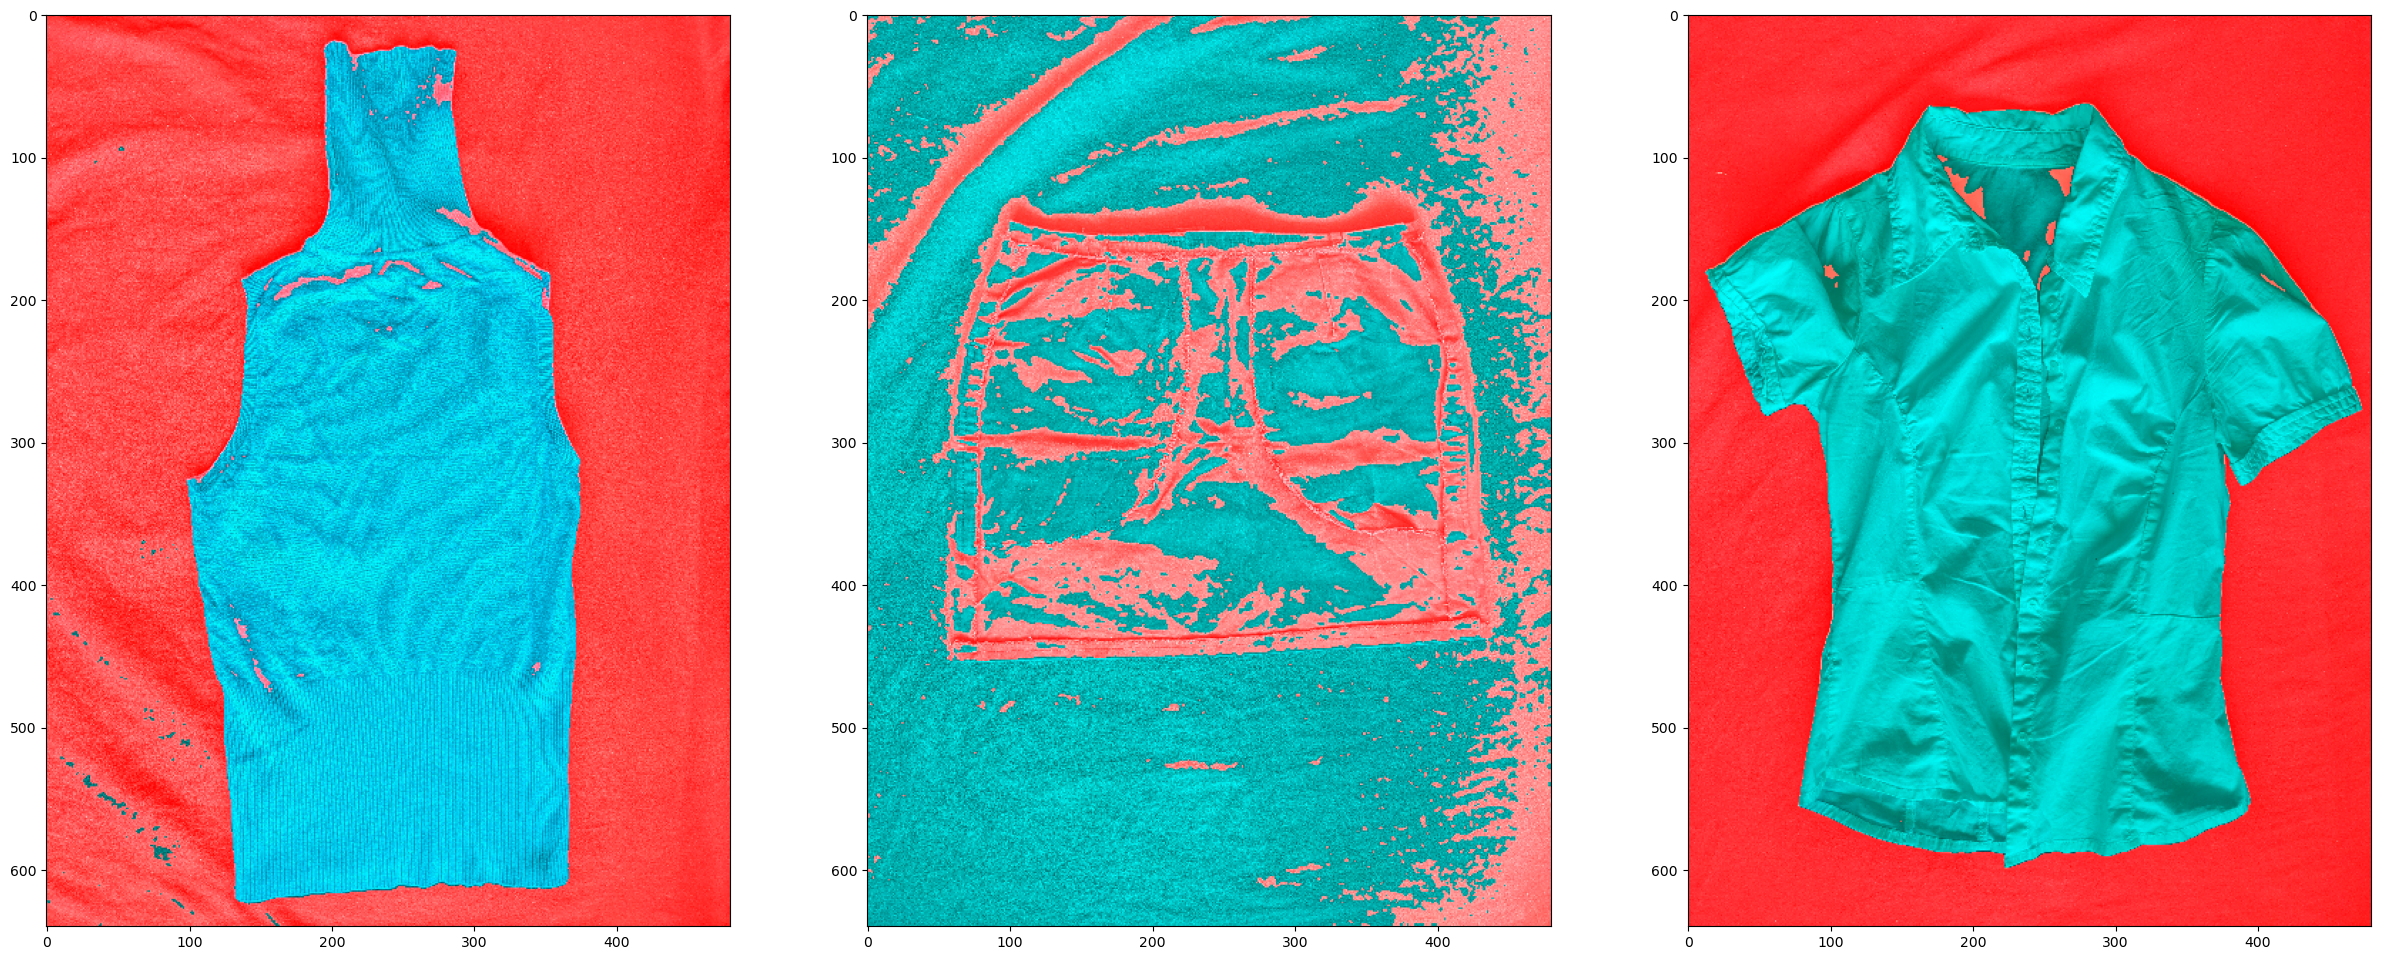

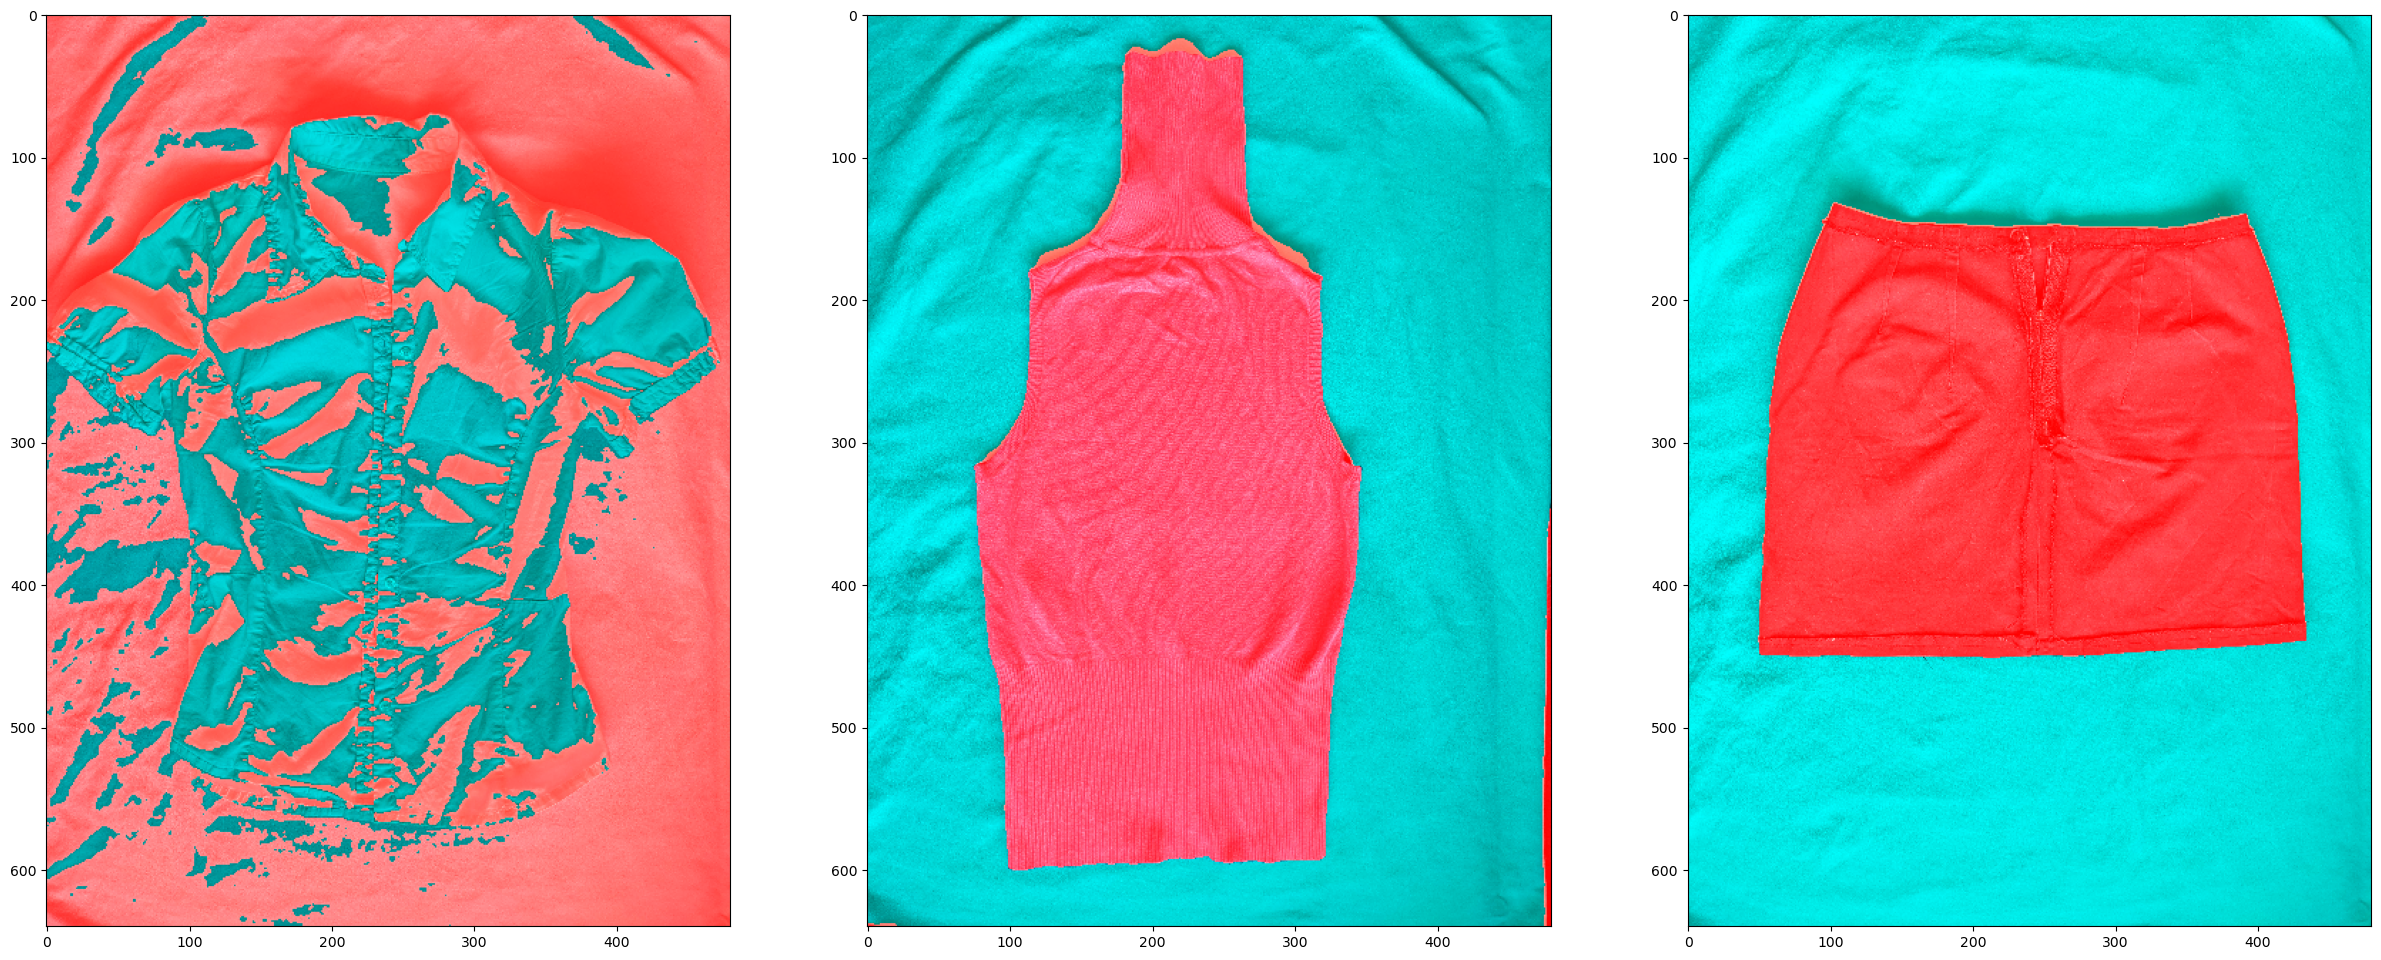

In [13]:
plot_images(black, 3)
# plot_images(green, 3)
# plot_images(grey, 3)
plot_images(white, 3)